# Data Preprocessing

Source: https://www.kaggle.com/donjoeml/energy-consumption-and-generation-in-the-globe


In [1]:
# Import dependencies
import io
import re
from itertools import groupby, combinations
from functools import reduce
import typing

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Import & inspect

In [2]:
# Setup imports
file_paths = {
    'power_plants': '../data/global_power_plant_database_last.csv', 
    'primary_consumption': '../data/Primary-energy-consumption-from-fossilfuels-nuclear-renewables.csv', 
    'shared_production': '../data/share-elec-produc-by-source.csv', 
    'shared_consumption': '../data/share-energy-consum-by-source.csv'
}

In [3]:
# Read in datasets
dfs = {}

for name, path in file_paths.items():
    dfs[name] = pd.read_csv(path)

/var/folders/dl/js17w9rx0xg2plhj4chp19pw0000gn/T/ipykernel_7759/3848680433.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(path)


In [4]:
# Display head of every dataframe
for name, df in dfs.items():
    print(name.upper())
    display(df.head())

POWER_PLANTS


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


PRIMARY_CONSUMPTION


,Entity,Code,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
0,Africa,NaN,1965,94.463,5.537,0.0
1,Africa,NaN,1966,94.127,5.873,0.0
2,Africa,NaN,1967,93.920,6.080,0.0
3,Africa,NaN,1968,93.257,6.743,0.0
4,Africa,NaN,1969,92.317,7.683,0.0


SHARED_PRODUCTION


,Entity,Code,Year,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,33.190578,66.809422,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,15.878378,84.121622,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,19.213974,80.786026,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,32.907348,67.092652,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,36.800895,63.199105,0.0,0.0,0.0,0.0,0.0


SHARED_CONSUMPTION


,Entity,Code,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,NaN,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,NaN,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,NaN,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,NaN,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,NaN,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [5]:
# Display columns, null counts, and coverage

num_rows_pattern = re.compile(r':\s([^\s]+)')
column_num_pattern = re.compile(r'^\s*[^\s]+')
extract_info_pattern = re.compile(r'\s{2,}')

def extract_info(df, info_str):

    def transform_str(info_line):
        #  Remove "non-null" and column number
        info_line = re.sub(column_num_pattern, '', info_line.replace('non-null', ''))

        # Extract remaining strings
        return re.split(extract_info_pattern, info_line.strip())


    rows_match = re.findall(num_rows_pattern, info_str.split('\n')[1])
    num_rows = int(rows_match[0])

    # Build dataframe with info data    
    info_df = pd.DataFrame([transform_str(s) for s in info_str.split('\n')[5:-3]], 
                                columns=['column', 'non_null', 'dtype'])

    # Calculate coverage percentage
    info_df['non_null'] = info_df['non_null'].astype(int)
    info_df['coverage'] = info_df['non_null'] / num_rows

    # Include number of unique values
    info_df['nunique'] = df.nunique().values

    info_df = info_df[['column', 'non_null', 'coverage', 'nunique', 'dtype']].set_index('column')

    return info_df


for name, df in dfs.items():
    print(name.upper())

    # convert columns to lowercase
    df.columns = [c.lower() for c in df.columns]

    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()

    display(extract_info(df, info_str))

POWER_PLANTS


,non_null,coverage,nunique,dtype
column,,,,
country,34936,1.000000,167,object
country_long,34936,1.000000,167,object
name,34936,1.000000,34528,object
gppd_idnr,34936,1.000000,34936,object
capacity_mw,34936,1.000000,5611,float64
latitude,34936,1.000000,31779,float64
longitude,34936,1.000000,33036,float64
primary_fuel,34936,1.000000,15,object
other_fuel1,1944,0.055645,12,object


PRIMARY_CONSUMPTION


,non_null,coverage,nunique,dtype
column,,,,
entity,4284,1.000000,83,object
code,4119,0.961485,80,object
year,4284,1.000000,55,int64
fossil fuels (% sub energy),4284,1.000000,3551,float64
renewables (% sub energy),4284,1.000000,3422,float64
nuclear (% sub energy),4284,1.000000,1454,float64


SHARED_PRODUCTION


,non_null,coverage,nunique,dtype
column,,,,
entity,6190,1.000000,235,object
code,5423,0.876090,211,object
year,6190,1.000000,36,int64
coal (% electricity),5170,0.835218,2309,float64
gas (% electricity),5170,0.835218,3069,float64
hydro (% electricity),6190,1.000000,4793,float64
solar (% electricity),6190,1.000000,2844,float64
wind (% electricity),6190,1.000000,2729,float64
oil (% electricity),5170,0.835218,3943,float64


SHARED_CONSUMPTION


,non_null,coverage,nunique,dtype
column,,,,
entity,4284,1.000000,83,object
code,4119,0.961485,80,object
year,4284,1.000000,55,int64
oil (% sub energy),4284,1.000000,4118,float64
coal (% sub energy),4284,1.000000,3569,float64
solar (% sub energy),4284,1.000000,434,float64
nuclear (% sub energy),4284,1.000000,1454,float64
hydro (% sub energy),4284,1.000000,3206,float64
wind (% sub energy),4284,1.000000,789,float64


## Consumption & Production

### Merge the two datasets

In [6]:
# Remeber energy consumption dataframe
consumption_df = dfs['shared_consumption']
consumption_df.head(10)

,entity,code,year,oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
0,Africa,NaN,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.000
1,Africa,NaN,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.000
2,Africa,NaN,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.000
3,Africa,NaN,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.000
4,Africa,NaN,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.000
5,Africa,NaN,1970,48.014,41.398,0.0,0.0,8.807,0.0,1.781,0.000
6,Africa,NaN,1971,49.942,40.437,0.0,0.0,7.629,0.0,1.943,0.048
7,Africa,NaN,1972,51.049,38.253,0.0,0.0,8.196,0.0,2.456,0.046
8,Africa,NaN,1973,50.710,37.603,0.0,0.0,8.007,0.0,3.637,0.043
9,Africa,NaN,1974,50.013,37.345,0.0,0.0,8.693,0.0,3.906,0.043


In [7]:
# Inspect column stats
consumption_df.describe()

,year,oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
count,4284.000000,4284.00000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,1993.113912,48.48012,17.763976,0.079402,3.126016,8.624511,0.345406,20.811585,0.626893
std,15.678077,20.78287,19.723911,0.336582,6.639930,12.279163,1.337962,20.448799,1.867764
min,1965.000000,5.05300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,34.16675,2.005750,0.000000,0.000000,0.521750,0.000000,3.839750,0.000000
50%,1994.000000,45.07950,11.035000,0.000000,0.000000,4.084000,0.000000,15.838000,0.039000
75%,2007.000000,62.36550,26.766250,0.001000,2.121750,10.854250,0.020000,30.498750,0.442250
max,2019.000000,100.00000,89.158000,3.593000,41.707000,71.055000,20.660000,90.744000,24.594000


In [8]:
# Remeber energy production dataframe
production_df = dfs['shared_production']
production_df.head(10)

,entity,code,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,33.190578,66.809422,0.0,0.000000,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,15.878378,84.121622,0.0,0.000000,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,19.213974,80.786026,0.0,0.000000,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,32.907348,67.092652,0.0,0.000000,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,36.800895,63.199105,0.0,0.000000,0.0,0.0,0.0
5,Afghanistan,AFG,2005,0.0,36.830835,63.169165,0.0,0.000000,0.0,0.0,0.0
6,Afghanistan,AFG,2006,0.0,23.894863,76.105137,0.0,0.000000,0.0,0.0,0.0
7,Afghanistan,AFG,2007,0.0,20.930233,79.069767,0.0,0.000000,0.0,0.0,0.0
8,Afghanistan,AFG,2008,0.0,25.549100,74.449527,0.0,0.001374,0.0,0.0,0.0
9,Afghanistan,AFG,2009,0.0,17.268948,82.720392,0.0,0.010660,0.0,0.0,0.0


In [9]:
# Inspect column stats
production_df.describe()

,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity)
count,6190.000000,5170.000000,5170.000000,6190.000000,6190.000000,6190.000000,5170.000000,6190.000000,6155.000000
mean,2005.501131,17.431687,23.251049,26.213096,0.406232,1.308663,34.659474,5.248678,1.969872
std,9.321596,39.898895,37.708235,30.950684,1.456500,5.890959,40.407903,13.252240,4.691999
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.145994,0.000000,0.000000,1.680045,0.000000,0.000000
50%,2007.000000,0.000000,8.004601,12.178127,0.000000,0.000000,12.568226,0.000000,0.065476
75%,2013.000000,24.295534,32.603113,47.546039,0.057878,0.139802,68.453354,0.000000,1.558274
max,2020.000000,523.074933,310.456745,100.000000,25.711136,100.000000,267.854610,86.919532,49.047163


In [10]:
# See sample data from a single country
us_production = production_df[production_df['entity'] == ('United States')]
us_production.head()

,entity,code,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity)
5846,United States,USA,1985,56.739913,11.814176,10.807909,0.000404,0.000219,4.054885,15.199931,1.369621
5847,United States,USA,1986,55.683047,9.985130,11.097250,0.000530,0.000158,5.488013,16.285916,1.446190
5848,United States,USA,1987,56.776401,10.574276,9.213250,0.000382,0.000129,4.596029,17.287031,1.539043
5849,United States,USA,1988,56.841540,9.326943,7.836298,0.000315,0.000030,5.493568,19.033069,1.454618
5850,United States,USA,1989,54.237675,12.016380,8.706340,0.008022,0.067609,5.600774,17.658830,1.548251


In [11]:
# Function to compare df to baseline validation df
def buildAndValidate(df, baseline_df=None, entity='United States', year=2019):
    validation_df = df[(df['entity'] == entity) & (df['year'] == year)]
    if baseline_df is not None:
        return baseline_df.equals(validation_df), validation_df
    return validation_df

In [12]:
# Confirm validation function
buildAndValidate(production_df)

,entity,code,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity)
5880,United States,USA,2019,23.185858,38.403812,6.790588,2.568435,7.085962,0.763413,19.448378,1.753554


In [13]:
# Inspect country/location values for consumption and production
production_countries = production_df['entity']
consumption_countries = consumption_df['entity']

print('production', len(production_countries))
print('consumption', len(consumption_countries))

production 6190
consumption 4284


In [14]:
# Get shared countries
country_overlap = pd.Series(list(set(production_countries).intersection(set(consumption_countries))))
country_overlap

0           Canada
1       Bangladesh
2           Brazil
3         Malaysia
4        Venezuela
          ...     
78         Algeria
79         Ecuador
80    Saudi Arabia
81     Netherlands
82       Lithuania
Length: 83, dtype: object

In [15]:
# Create fully joined df
product_and_consume_df = pd.merge(production_df, consumption_df, on=['entity', 'year'], how='inner')
product_and_consume_df.head()

,entity,code_x,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity),code_y,oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
0,Africa,NaN,1985,53.869485,10.783022,19.093587,0.0,0.0,13.242261,2.052236,0.103867,NaN,45.185,35.400,0.0,0.664,6.177,0.0,12.540,0.034
1,Africa,NaN,1986,52.600209,10.495367,18.935040,0.0,0.0,13.766315,3.259047,0.243975,NaN,43.475,35.372,0.0,1.074,6.240,0.0,13.759,0.080
2,Africa,NaN,1987,54.316611,11.269555,17.503940,0.0,0.0,13.802774,2.200460,0.234782,NaN,44.311,35.295,0.0,0.730,5.806,0.0,13.780,0.078
3,Africa,NaN,1988,51.625800,11.517103,18.149086,0.0,0.0,14.430585,3.553388,0.211991,NaN,43.246,35.370,0.0,1.158,5.915,0.0,14.242,0.069
4,Africa,NaN,1989,51.267484,12.046066,18.352067,0.0,0.0,14.132786,3.619461,0.201208,NaN,44.704,33.100,0.0,1.221,6.192,0.0,14.715,0.068


In [16]:
# Assert merged codes are aligned (sanity check)
neq_condition = product_and_consume_df['code_x'].fillna(0) != product_and_consume_df['code_y'].fillna(0)
codes_comparison = product_and_consume_df[neq_condition]
assert(len(codes_comparison) == 0)

In [17]:
# Can drop both code columns
product_and_consume_df = product_and_consume_df.drop(['code_y', 'code_x'], axis=1)
product_and_consume_df.head()

,entity,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity),oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
0,Africa,1985,53.869485,10.783022,19.093587,0.0,0.0,13.242261,2.052236,0.103867,45.185,35.400,0.0,0.664,6.177,0.0,12.540,0.034
1,Africa,1986,52.600209,10.495367,18.935040,0.0,0.0,13.766315,3.259047,0.243975,43.475,35.372,0.0,1.074,6.240,0.0,13.759,0.080
2,Africa,1987,54.316611,11.269555,17.503940,0.0,0.0,13.802774,2.200460,0.234782,44.311,35.295,0.0,0.730,5.806,0.0,13.780,0.078
3,Africa,1988,51.625800,11.517103,18.149086,0.0,0.0,14.430585,3.553388,0.211991,43.246,35.370,0.0,1.158,5.915,0.0,14.242,0.069
4,Africa,1989,51.267484,12.046066,18.352067,0.0,0.0,14.132786,3.619461,0.201208,44.704,33.100,0.0,1.221,6.192,0.0,14.715,0.068


In [18]:
# Filter dataframe to only contain overlapping countries
common_countries = product_and_consume_df[product_and_consume_df['entity'].isin(country_overlap)]
common_countries.head()

,entity,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity),oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
0,Africa,1985,53.869485,10.783022,19.093587,0.0,0.0,13.242261,2.052236,0.103867,45.185,35.400,0.0,0.664,6.177,0.0,12.540,0.034
1,Africa,1986,52.600209,10.495367,18.935040,0.0,0.0,13.766315,3.259047,0.243975,43.475,35.372,0.0,1.074,6.240,0.0,13.759,0.080
2,Africa,1987,54.316611,11.269555,17.503940,0.0,0.0,13.802774,2.200460,0.234782,44.311,35.295,0.0,0.730,5.806,0.0,13.780,0.078
3,Africa,1988,51.625800,11.517103,18.149086,0.0,0.0,14.430585,3.553388,0.211991,43.246,35.370,0.0,1.158,5.915,0.0,14.242,0.069
4,Africa,1989,51.267484,12.046066,18.352067,0.0,0.0,14.132786,3.619461,0.201208,44.704,33.100,0.0,1.221,6.192,0.0,14.715,0.068


In [19]:
common_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2889
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   entity                            2890 non-null   object 
 1   year                              2890 non-null   int64  
 2   coal (% electricity)              2150 non-null   float64
 3   gas (% electricity)               2150 non-null   float64
 4   hydro (% electricity)             2890 non-null   float64
 5   solar (% electricity)             2890 non-null   float64
 6   wind (% electricity)              2890 non-null   float64
 7   oil (% electricity)               2150 non-null   float64
 8   nuclear (% electricity)           2890 non-null   float64
 9   other renewables (% electricity)  2890 non-null   float64
 10  oil (% sub energy)                2890 non-null   float64
 11  coal (% sub energy)               2890 non-null   float64
 12  solar 

In [20]:
# Establish baseline validation df
baseline_validation_df = buildAndValidate(common_countries)
baseline_validation_df

,entity,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity),oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
2749,United States,2019,23.185858,38.403812,6.790588,2.568435,7.085962,0.763413,19.448378,1.753554,39.079,11.982,1.021,8.025,2.554,2.855,32.202,0.738


### Clean combined production & consumption dataframe

In [21]:
# Function for performing reused grouping operations

def groupAndApply(df, group_columns, operation='mean', select_columns=[], column_rename_map={}):

    # Process 1 - averaging (need df, group_avg_cols)
    # Typical params:
    #   - group_columns = ['entity', 'year'] or ['entity', 'year', 'source']
    #   - select_columns = [c for c in agg_df.columns if c not in ['year', 'source']]
    #   - column_rename_map = {}
    if operation == 'mean':
        variable_mean_df = df.groupby(group_columns).transform('mean')
        return df.loc[:, group_columns].join(other=variable_mean_df, how='right')
    

    # Process 2 - row-wise diff (need df, group_diff_cols, select_diff_cols)
    # Typical params:
    #   - group_columns = ['entity']
    #   - select_columns = [c for c in agg_df.columns if c not in ['year', 'source']]
    #   - column_rename_map = { c: f'{c}_diff' for c in variable_cols }
    if operation == 'diff' and select_columns:
        variable_diffs_df = df[list(set(group_columns + select_columns))].groupby(group_columns).diff() \
                                                .fillna(0).rename(columns=column_rename_map)
        return pd.concat([df.loc[:,[c for c in df.columns if c not in list(column_rename_map.values())]], 
                            variable_diffs_df], axis=1)


    # Process 3 - reduce and sum (need df, group_reduce_cols, select_reduce_cols)
    # Typical params:
    #   - group_columns = ['entity', 'year']
    #   - select_columns = ['production_perc', 'consumption_perc', 'renewable', 'source']
    #   - column_rename_map = { 'production_perc': 'renewable_production_perc_per_year',
    #                                        'consumption_perc': 'renewable_consumption_perc_per_year' }
    if operation == 'reduce' and select_columns:
        reduce_groups = df[list(set(group_columns + select_columns))].groupby(group_columns[:-1])
        return reduce_groups.apply(func=lambda x: x[select_columns].groupby(group_columns[-1]) \
                                                                .sum() \
                                                                .rename(columns=column_rename_map))

In [22]:
# Ensure only one datapoint per (entity, year) by averaging
common_countries_by_year = groupAndApply(common_countries, ['entity', 'year'])

In [23]:
print(len(common_countries_by_year))
common_countries_by_year.tail()

2890


,entity,year,coal (% electricity),gas (% electricity),hydro (% electricity),solar (% electricity),wind (% electricity),oil (% electricity),nuclear (% electricity),other renewables (% electricity),oil (% sub energy),coal (% sub energy),solar (% sub energy),nuclear (% sub energy),hydro (% sub energy),wind (% sub energy),gas (% sub energy),other renewables (% sub energy)
2885,World,2015,37.767379,22.805036,16.575629,1.092341,3.554302,5.102175,10.706560,2.396578,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903
2886,World,2016,36.688135,23.056617,16.800175,1.377463,4.008043,5.026452,10.567135,2.475979,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901
2887,World,2017,36.666964,22.873988,16.586864,1.804265,4.619666,4.562145,10.353891,2.532219,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936
2888,World,2018,36.562980,22.470470,16.468280,2.241461,4.953471,4.477463,10.228620,2.597255,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955
2889,World,2019,35.064441,22.946552,16.452792,2.718259,5.470879,4.205853,10.504613,2.636612,33.059,27.035,1.105,4.269,6.446,2.183,24.226,0.995


In [24]:
# Rename columns for ease of referencing
column_mappings = {
    'coal (% electricity)': 'coal_production_perc',
    'coal (% sub energy)': 'coal_consumption_perc',

    'gas (% electricity)': 'gas_production_perc',
    'gas (% sub energy)': 'gas_consumption_perc',

    'hydro (% electricity)': 'hydro_production_perc',
    'hydro (% sub energy)': 'hydro_consumption_perc',

    'solar (% electricity)': 'solar_production_perc',
    'solar (% sub energy)': 'solar_consumption_perc',

    'wind (% electricity)': 'wind_production_perc',
    'wind (% sub energy)': 'wind_consumption_perc',

    'oil (% electricity)': 'oil_production_perc',
    'oil (% sub energy)': 'oil_consumption_perc',

    'nuclear (% electricity)': 'nuclear_production_perc',
    'nuclear (% sub energy)': 'nuclear_consumption_perc',

    'other renewables (% electricity)': 'other_renewable_production_perc',
    'other renewables (% sub energy)': 'other_consumption_perc',
}

# Apply mapping to current transformed df and baseline_validation df
common_countries_by_year = common_countries_by_year.rename(columns=column_mappings)
baseline_validation_df = baseline_validation_df.rename(columns=column_mappings)

In [25]:
is_valid, _ = buildAndValidate(common_countries_by_year, baseline_validation_df)
assert(is_valid)

In [26]:
# Need to drop rows with ANY null values
common_countries_by_year.dropna(inplace=True)
common_countries_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2889
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   entity                           2150 non-null   object 
 1   year                             2150 non-null   int64  
 2   coal_production_perc             2150 non-null   float64
 3   gas_production_perc              2150 non-null   float64
 4   hydro_production_perc            2150 non-null   float64
 5   solar_production_perc            2150 non-null   float64
 6   wind_production_perc             2150 non-null   float64
 7   oil_production_perc              2150 non-null   float64
 8   nuclear_production_perc          2150 non-null   float64
 9   other_renewable_production_perc  2150 non-null   float64
 10  oil_consumption_perc             2150 non-null   float64
 11  coal_consumption_perc            2150 non-null   float64
 12  solar_consumption_pe

### Transform into single consume & produce attributes

In [27]:
# Build new groups based upon energy source
source_extract_pattern = re.compile(r'^([^_]+)')
source_groups = common_countries_by_year.groupby(common_countries_by_year.columns.str \
                                            .extract(source_extract_pattern,
                                                        expand=False), axis=1)

In [28]:
# Apply transformation to include source and footprint ratio on each source group

def transformSourceGroup(group_df, group_name=None):

    if group_name in ['entity', 'year']:
        return group_df

    prod_col, cons_col = sorted(group_df.columns, key=lambda x: 'consumption' in x)

    column_rename_map = { prod_col : 'production', cons_col : 'consumption' }

    return pd.concat([group_df, pd.Series(group_name, index=range(len(group_df)), name='source')], axis=1).rename(columns=column_rename_map)


spread_sources_df = source_groups.apply(lambda g: transformSourceGroup(g, g.name))
spread_sources_df.head()


coal                     entity        gas                     \
  production consumption source  entity production consumption source   
0  53.869485      35.400   coal  Africa  10.783022      12.540    gas   
1  52.600209      35.372   coal  Africa  10.495367      13.759    gas   
2  54.316611      35.295   coal  Africa  11.269555      13.780    gas   
3  51.625800      35.370   coal  Africa  11.517103      14.242    gas   
4  51.267484      33.100   coal  Africa  12.046066      14.715    gas   

       hydro                     ...      other                         solar  \
  production consumption source  ... production consumption source production   
0  19.093587       6.177  hydro  ...   0.103867       0.034  other        0.0   
1  18.935040       6.240  hydro  ...   0.243975       0.080  other        0.0   
2  17.503940       5.806  hydro  ...   0.234782       0.078  other        0.0   
3  18.149086       5.915  hydro  ...   0.211991       0.069  other        0.0   
4  18.352067       6.192  hydro  ...   0.201208       0.068  other        0.0   

                           wind                       year  
  consumption source production consumption source    year  
0         0.0  solar        0.0         0.0   wind  1985.0  
1         0.0  solar        0.0         0.0   wind  1986.0  
2         0.0  solar        0.0         0.0   wind  1987.0  
3         0.0  solar        0.0         0.0   wind  1988.0  
4         0.0  solar        0.0         0.0   wind  1989.0  

[5 rows x 26 columns]

In [29]:
# Flatten the multi-index df 
spread_sources_df.columns = [str(col) for col in spread_sources_df.columns.values]
spread_sources_df = spread_sources_df.rename(columns={"('entity', 'entity')": 'entity', 
                                            "('year', 'year')": 'year'})
spread_sources_df.head()

,"('coal', 'production')","('coal', 'consumption')","('coal', 'source')",entity,"('gas', 'production')","('gas', 'consumption')","('gas', 'source')","('hydro', 'production')","('hydro', 'consumption')","('hydro', 'source')",...,"('other', 'production')","('other', 'consumption')","('other', 'source')","('solar', 'production')","('solar', 'consumption')","('solar', 'source')","('wind', 'production')","('wind', 'consumption')","('wind', 'source')",year
0,53.869485,35.400,coal,Africa,10.783022,12.540,gas,19.093587,6.177,hydro,...,0.103867,0.034,other,0.0,0.0,solar,0.0,0.0,wind,1985.0
1,52.600209,35.372,coal,Africa,10.495367,13.759,gas,18.935040,6.240,hydro,...,0.243975,0.080,other,0.0,0.0,solar,0.0,0.0,wind,1986.0
2,54.316611,35.295,coal,Africa,11.269555,13.780,gas,17.503940,5.806,hydro,...,0.234782,0.078,other,0.0,0.0,solar,0.0,0.0,wind,1987.0
3,51.625800,35.370,coal,Africa,11.517103,14.242,gas,18.149086,5.915,hydro,...,0.211991,0.069,other,0.0,0.0,solar,0.0,0.0,wind,1988.0
4,51.267484,33.100,coal,Africa,12.046066,14.715,gas,18.352067,6.192,hydro,...,0.201208,0.068,other,0.0,0.0,solar,0.0,0.0,wind,1989.0


### Restructure dataframe without sources in columns (transform into attribute)

In [30]:
# Group/collect each field

target_keywords = {
    'production': 'production_percent', 
    'consumption': 'consumption_percent'
    # 'ratio': 'consumed_to_produced_ratio'
}
concat_dfs = []
source_label_pattern = re.compile(r'\'([^\']+)\',')

# Collect all energy sources by prefix of columns
unique_spread_cols = [col for col in spread_sources_df.columns 
                        if not any(s in col for s in ['entity', 'year'])]
source_labels = np.unique(np.array([re.findall(source_label_pattern, s)[0] for s in unique_spread_cols]))

for old_col_keyword, new_col_name in target_keywords.items():
    # Extract relevant columns containing the keyword
    target_cols = [x for x in spread_sources_df.columns if old_col_keyword in x]

    # Combine all columns containing the keyword into a single dataframe
    curr_concat_df = pd.concat([spread_sources_df[['entity', 'year', x]] for x in target_cols], keys=source_labels)

    # Shift source index to a column
    curr_concat_df['source'] = curr_concat_df.index.get_level_values(0)
    
    # print(len(curr_concat_df))
    # Build new column for this keyword by summing values across rows 
    # (each row will have exactly one column value (or null))
    curr_concat_df[new_col_name] = curr_concat_df[target_cols].fillna(0).sum(axis=1)

    # Remove the old columns and add this df to the list
    curr_concat_df = curr_concat_df.drop(target_cols, axis=1).dropna()
    concat_dfs.append(curr_concat_df)

In [31]:
# Quick peek at result of concatenation
concat_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17200 entries, ('coal', 0) to ('wind', 2889)
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entity              17200 non-null  object 
 1   year                17200 non-null  float64
 2   source              17200 non-null  object 
 3   production_percent  17200 non-null  float64
dtypes: float64(2), object(2)
memory usage: 674.3+ KB


In [32]:
# Sanity check for the size of all the concatenated dfs
assert(all(len(df1) == len(df2) for (df1, df2) in combinations(concat_dfs, 2)))

In [33]:
# Finally merge everything
agg_df = reduce(lambda left, right: pd.merge(left, right, on=['entity', 'year', 'source']), concat_dfs)
agg_df.head()

,entity,year,source,production_percent,consumption_percent
0,Africa,1985.0,coal,53.869485,35.400
1,Africa,1986.0,coal,52.600209,35.372
2,Africa,1987.0,coal,54.316611,35.295
3,Africa,1988.0,coal,51.625800,35.370
4,Africa,1989.0,coal,51.267484,33.100


In [34]:
# Inspect the results of the merging
agg_df.describe()

,year,production_percent,consumption_percent
count,17200.000000,17200.000000,17200.000000
mean,2005.348837,12.477864,12.465625
std,9.230864,20.902733,18.747173
min,1985.000000,0.000000,0.000000
25%,2000.000000,0.000219,0.003000
50%,2006.000000,1.899690,1.717500
75%,2013.000000,16.276146,20.734750
max,2019.000000,100.000000,99.033000


In [35]:
# Generate new baseline validation df due to transformations
baseline_validation_df = buildAndValidate(agg_df)
baseline_validation_df

,entity,year,source,production_percent,consumption_percent
2039,United States,2019.0,coal,23.185858,11.982
4189,United States,2019.0,gas,38.403812,32.202
6339,United States,2019.0,hydro,6.790588,2.554
8489,United States,2019.0,nuclear,19.448378,8.025
10639,United States,2019.0,oil,0.763413,39.079
12789,United States,2019.0,other,1.753554,0.738
14939,United States,2019.0,solar,2.568435,1.021
17089,United States,2019.0,wind,7.085962,2.855


### Categorize sources as renewable or not

In [36]:
# Make source a categorical value
agg_df['source'] = agg_df['source'].astype("category")

In [37]:
# Define source mappings
renewable_sources = ['solar', 'hydro', 'wind', 'other']

renewable_categories = { x : True for x in renewable_sources }
renewable_categories.update({ x: False for x in source_labels if x not in renewable_sources})
renewable_categories

{'solar': True,
 'hydro': True,
 'wind': True,
 'other': True,
 'coal': False,
 'gas': False,
 'nuclear': False,
 'oil': False}

In [38]:
# Apply mapping
agg_df['renewable'] = agg_df['source'].map(renewable_categories)

In [39]:
# Confirm transformations
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17200 entries, 0 to 17199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   entity               17200 non-null  object  
 1   year                 17200 non-null  float64 
 2   source               17200 non-null  category
 3   production_percent   17200 non-null  float64 
 4   consumption_percent  17200 non-null  float64 
 5   renewable            17200 non-null  object  
dtypes: category(1), float64(3), object(2)
memory usage: 823.4+ KB


### Calculate the portion of consumption & production that is renewable

In [40]:
# Group according to country and year
group_cols = ['entity', 'year', 'renewable']
variable_cols = ['production_percent', 'consumption_percent', 'renewable', 'source']

reduced_renewables = groupAndApply(df=agg_df, 
                                    operation='reduce',
                                    group_columns=group_cols,
                                    select_columns=variable_cols,
                                    column_rename_map={}) 

In [41]:
reduced_renewables.head(15)

production_percent  consumption_percent
entity year   renewable                                         
Africa 1985.0 False               79.947003               93.789
              True                19.197453                6.211
       1986.0 False               80.120938               93.680
              True                19.179015                6.320
       1987.0 False               81.589400               94.116
              True                17.738723                5.884
       1988.0 False               81.126876               94.016
              True                18.361077                5.984
       1989.0 False               81.065798               93.740
              True                18.553275                6.260
       1990.0 False               81.178224               93.819
              True                18.192714                6.181
       1991.0 False               80.537142               93.450
              True                18.904574                6.551
       1992.0 False               81.700925               93.847

In [42]:
# Sanity check; assert even number of rows (Tue/False for each)
assert(len(reduced_renewables) % 2 == 0)

In [43]:
# Flatten multi-index
reduced_renewables.reset_index(inplace=True)
reduced_renewables.head(15) 

,entity,year,renewable,production_percent,consumption_percent
0,Africa,1985.0,False,79.947003,93.789
1,Africa,1985.0,True,19.197453,6.211
2,Africa,1986.0,False,80.120938,93.680
3,Africa,1986.0,True,19.179015,6.320
4,Africa,1987.0,False,81.589400,94.116
5,Africa,1987.0,True,17.738723,5.884
6,Africa,1988.0,False,81.126876,94.016
7,Africa,1988.0,True,18.361077,5.984
8,Africa,1989.0,False,81.065798,93.740
9,Africa,1989.0,True,18.553275,6.260


In [44]:
# Add source column to use for representing "aggregate" source
reduced_renewables['source'] = 'agg_renew'
reduced_renewables.loc[reduced_renewables['renewable'] == False, 'source'] = 'agg_non_renew'

In [45]:
# Concat to main df
agg_renewable_df = pd.concat([agg_df, reduced_renewables]).reset_index().drop('index', axis=1)
agg_renewable_df.head()

,entity,year,source,production_percent,consumption_percent,renewable
0,Africa,1985.0,coal,53.869485,35.400,False
1,Africa,1986.0,coal,52.600209,35.372,False
2,Africa,1987.0,coal,54.316611,35.295,False
3,Africa,1988.0,coal,51.625800,35.370,False
4,Africa,1989.0,coal,51.267484,33.100,False


### Add ratio of consumed / produced

In [46]:
agg_renewable_df['cp_ratio'] = agg_renewable_df['consumption_percent'] / agg_renewable_df['production_percent']

In [47]:
# Want to clean up `consumed_to_produced_ratio`
agg_renewable_df[agg_renewable_df['cp_ratio'] == np.inf].count()

entity                 720
year                   720
source                 720
production_percent     720
consumption_percent    720
renewable              720
cp_ratio               720
dtype: int64

In [48]:
# Get rid of all infinite entries
agg_renewable_df.drop(agg_renewable_df[agg_renewable_df['cp_ratio'] == np.inf].index, inplace=True)
agg_renewable_df.describe()

,year,production_percent,consumption_percent,cp_ratio
count,20780.000000,20780.000000,20780.000000,17192.000000
mean,2005.254042,20.656330,20.137977,26.069570
std,9.276285,29.185293,29.642174,458.270485
min,1985.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.061632,0.025000,0.368826
50%,2006.000000,5.485970,4.532500,0.477303
75%,2013.000000,29.362610,28.660500,1.097532
max,2019.000000,100.000000,100.001000,17705.419498


In [49]:
# Check for null values
agg_renewable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20780 entries, 0 to 21499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entity               20780 non-null  object 
 1   year                 20780 non-null  float64
 2   source               20780 non-null  object 
 3   production_percent   20780 non-null  float64
 4   consumption_percent  20780 non-null  float64
 5   renewable            20780 non-null  object 
 6   cp_ratio             17192 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [50]:
# Fill NA with 0
agg_renewable_df.fillna(0, inplace=True)

In [51]:
# Quick inspection of potential outliers
agg_renewable_df[agg_renewable_df['cp_ratio'] > 100] # represents 100x more consumed than produced...

,entity,year,source,production_percent,consumption_percent,renewable,cp_ratio
538,Estonia,2013.0,coal,0.097932,63.324,False,646.614565
539,Estonia,2014.0,coal,0.048209,65.492,False,1358.491169
542,Estonia,2017.0,coal,0.136249,63.604,False,466.820546
1032,Latvia,2007.0,coal,0.020961,2.744,False,130.912179
1038,Latvia,2013.0,coal,0.016107,2.005,False,124.479042
...,...,...,...,...,...,...,...
18666,Iceland,2018.0,agg_non_renew,0.009675,22.277,False,2302.574419
18668,Iceland,2019.0,agg_non_renew,0.014638,20.590,False,1406.592926
19730,Norway,2000.0,agg_non_renew,0.194665,28.871,False,148.311488
19732,Norway,2001.0,agg_non_renew,0.268797,33.807,False,125.771666


<AxesSubplot:xlabel='cp_ratio', ylabel='Density'>

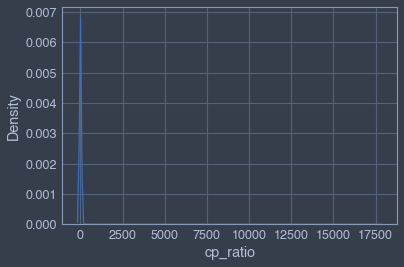

In [52]:
# Visualze column distribution
sns.kdeplot(agg_renewable_df['cp_ratio'], x='cp_ratio')

### Calculate a relative scale for the degree of production and consumption

In [53]:
# Check for any null
agg_renewable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20780 entries, 0 to 21499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entity               20780 non-null  object 
 1   year                 20780 non-null  float64
 2   source               20780 non-null  object 
 3   production_percent   20780 non-null  float64
 4   consumption_percent  20780 non-null  float64
 5   renewable            20780 non-null  bool   
 6   cp_ratio             20780 non-null  float64
dtypes: bool(1), float64(4), object(2)
memory usage: 1.1+ MB


In [54]:
# Define wrapper class for applying scaler to groups of sources
class SklearnWrapper:
    def __init__(self, transform: typing.Callable):
        self.transform = transform

    def __call__(self, df):
        grouped_cols = [c for c in df.columns if c != 'source']
        transformed = self.transform.fit_transform(df[grouped_cols].values)
        return pd.DataFrame(transformed, columns=grouped_cols, index=df.index)

In [55]:
# Build scaling pipelines (only scalers, no estimator)
percents_pipe = Pipeline([('power', PowerTransformer()), ('robust', RobustScaler()), ('max_abs', MaxAbsScaler())])

ratios_pipe = Pipeline([('power', PowerTransformer()), ('robust', RobustScaler()), ('std', StandardScaler())])

In [56]:
# Apply scalers to percent groups
scaled_col_mapping = { 'production_percent': 'production_relative_to_source',
                        'consumption_percent': 'consumption_relative_to_source'}

relative_scaled_percs = agg_renewable_df[['source', 'production_percent', 'consumption_percent']] \
    .groupby('source').apply(SklearnWrapper(percents_pipe)).rename(columns=scaled_col_mapping)
    
relative_scaled_percs.head()

,production_relative_to_source,consumption_relative_to_source
0,0.461895,0.413335
1,0.444534,0.412836
2,0.467954,0.411460
3,0.431041,0.412800
4,0.426042,0.371392


In [57]:
# Apply scalers to ratio group
scaled_col_mapping.update({ 'cp_ratio': 'cp_ratio_relative_to_source'})
relative_scaled_ratios = agg_renewable_df[['source', 'cp_ratio']] \
    .groupby('source').apply(SklearnWrapper(ratios_pipe)).rename(columns=scaled_col_mapping)
    
relative_scaled_ratios.head()

,cp_ratio_relative_to_source
0,-0.046351
1,-0.017315
2,-0.060466
3,0.006238
4,-0.068537


In [58]:
# Combine scaled values
relative_scaled_vals = relative_scaled_percs.join(relative_scaled_ratios)
relative_scaled_vals.head()

,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source
0,0.461895,0.413335,-0.046351
1,0.444534,0.412836,-0.017315
2,0.467954,0.411460,-0.060466
3,0.431041,0.412800,0.006238
4,0.426042,0.371392,-0.068537


<AxesSubplot:xlabel='production_relative_to_source', ylabel='Density'>

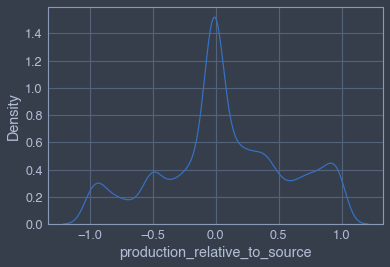

In [59]:
# Visualize scaled distributions
sns.kdeplot(data=relative_scaled_vals, x=scaled_col_mapping['production_percent'])

<AxesSubplot:xlabel='consumption_relative_to_source', ylabel='Density'>

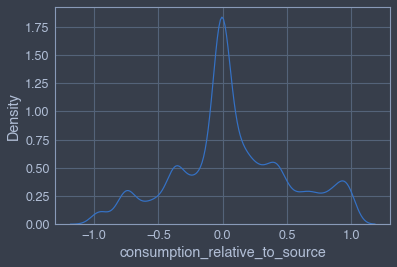

In [60]:
sns.kdeplot(data=relative_scaled_vals, x=scaled_col_mapping['consumption_percent'])

<AxesSubplot:xlabel='cp_ratio_relative_to_source', ylabel='Density'>

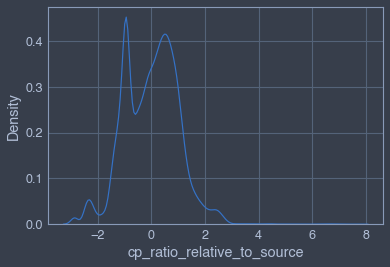

In [61]:
sns.kdeplot(data=relative_scaled_vals, x=scaled_col_mapping['cp_ratio'])

In [62]:
# Combine scaled values with original dataframe
agg_scaled_df = agg_renewable_df.join(relative_scaled_vals)
agg_scaled_df.head()

,entity,year,source,production_percent,consumption_percent,renewable,cp_ratio,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source
0,Africa,1985.0,coal,53.869485,35.400,False,0.657144,0.461895,0.413335,-0.046351
1,Africa,1986.0,coal,52.600209,35.372,False,0.672469,0.444534,0.412836,-0.017315
2,Africa,1987.0,coal,54.316611,35.295,False,0.649801,0.467954,0.411460,-0.060466
3,Africa,1988.0,coal,51.625800,35.370,False,0.685123,0.431041,0.412800,0.006238
4,Africa,1989.0,coal,51.267484,33.100,False,0.645633,0.426042,0.371392,-0.068537


In [63]:
agg_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20780 entries, 0 to 21499
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   entity                          20780 non-null  object 
 1   year                            20780 non-null  float64
 2   source                          20780 non-null  object 
 3   production_percent              20780 non-null  float64
 4   consumption_percent             20780 non-null  float64
 5   renewable                       20780 non-null  bool   
 6   cp_ratio                        20780 non-null  float64
 7   production_relative_to_source   20780 non-null  float64
 8   consumption_relative_to_source  20780 non-null  float64
 9   cp_ratio_relative_to_source     20780 non-null  float64
dtypes: bool(1), float64(7), object(2)
memory usage: 2.1+ MB


In [64]:
agg_scaled_df.describe()

,year,production_percent,consumption_percent,cp_ratio,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04
mean,2005.254042,20.656330,20.137977,21.568241,0.067738,0.071854,5.812910e-18
std,9.276285,29.185293,29.642174,416.947567,0.502009,0.445538,1.000024e+00
min,1985.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.859007e+00
25%,2000.000000,0.061632,0.025000,0.265007,-0.193982,-0.156021,-9.084819e-01
50%,2006.000000,5.485970,4.532500,0.422989,0.000000,0.000000,6.818434e-02
75%,2013.000000,29.362610,28.660500,1.003129,0.404497,0.348302,6.941564e-01
max,2019.000000,100.000000,100.001000,17705.419498,1.000000,1.000000,7.666128e+00


### Gather final attibute for year-to-year change of renewability distributions

In [65]:
# Semenatic change; year into integer and create datetime column
agg_scaled_df['year'] = agg_scaled_df['year'].astype(int)

agg_scaled_df['date'] = pd.to_datetime(agg_scaled_df['year'], format='%Y')

In [66]:
agg_scaled_df.head()

,entity,year,source,production_percent,consumption_percent,renewable,cp_ratio,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source,date
0,Africa,1985,coal,53.869485,35.400,False,0.657144,0.461895,0.413335,-0.046351,1985-01-01
1,Africa,1986,coal,52.600209,35.372,False,0.672469,0.444534,0.412836,-0.017315,1986-01-01
2,Africa,1987,coal,54.316611,35.295,False,0.649801,0.467954,0.411460,-0.060466,1987-01-01
3,Africa,1988,coal,51.625800,35.370,False,0.685123,0.431041,0.412800,0.006238,1988-01-01
4,Africa,1989,coal,51.267484,33.100,False,0.645633,0.426042,0.371392,-0.068537,1989-01-01


In [67]:
agg_scaled_df.describe()

,year,production_percent,consumption_percent,cp_ratio,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04
mean,2005.254042,20.656330,20.137977,21.568241,0.067738,0.071854,5.812910e-18
std,9.276285,29.185293,29.642174,416.947567,0.502009,0.445538,1.000024e+00
min,1985.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.859007e+00
25%,2000.000000,0.061632,0.025000,0.265007,-0.193982,-0.156021,-9.084819e-01
50%,2006.000000,5.485970,4.532500,0.422989,0.000000,0.000000,6.818434e-02
75%,2013.000000,29.362610,28.660500,1.003129,0.404497,0.348302,6.941564e-01
max,2019.000000,100.000000,100.001000,17705.419498,1.000000,1.000000,7.666128e+00


In [68]:
agg_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20780 entries, 0 to 21499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   entity                          20780 non-null  object        
 1   year                            20780 non-null  int64         
 2   source                          20780 non-null  object        
 3   production_percent              20780 non-null  float64       
 4   consumption_percent             20780 non-null  float64       
 5   renewable                       20780 non-null  bool          
 6   cp_ratio                        20780 non-null  float64       
 7   production_relative_to_source   20780 non-null  float64       
 8   consumption_relative_to_source  20780 non-null  float64       
 9   cp_ratio_relative_to_source     20780 non-null  float64       
 10  date                            20780 non-null  datetime64[ns]
dtypes:

In [69]:
# Mainly for ease of visualization
multi_idx_result = agg_scaled_df.set_index(['entity', 'year'])
multi_idx_result.head()

source  production_percent  consumption_percent  renewable  \
entity year                                                              
Africa 1985   coal           53.869485               35.400      False   
       1986   coal           52.600209               35.372      False   
       1987   coal           54.316611               35.295      False   
       1988   coal           51.625800               35.370      False   
       1989   coal           51.267484               33.100      False   

             cp_ratio  production_relative_to_source  \
entity year                                            
Africa 1985  0.657144                       0.461895   
       1986  0.672469                       0.444534   
       1987  0.649801                       0.467954   
       1988  0.685123                       0.431041   
       1989  0.645633                       0.426042   

             consumption_relative_to_source  cp_ratio_relative_to_source  \
entity year                                                                
Africa 1985                        0.413335                    -0.046351   
       1986                        0.412836                    -0.017315   
       1987                        0.411460                    -0.060466   
       1988                        0.412800                     0.006238   
       1989                        0.371392                    -0.068537   

                  date  
entity year             
Africa 1985 1985-01-01  
       1986 1986-01-01  
       1987 1987-01-01  
       1988 1988-01-01  
       1989 1989-01-01

### Final inspections & output

In [70]:
# Display a random sampling
sample_frac = 0.01 # Look at 1% of data
rand_sample = agg_scaled_df.sample(frac=sample_frac)

# Organize for easier visualization
rand_sample.sort_values(by=['entity','year'])

,entity,year,source,production_percent,consumption_percent,renewable,cp_ratio,production_relative_to_source,consumption_relative_to_source,cp_ratio_relative_to_source,date
4,Africa,1989,coal,51.267484,33.100,False,0.645633,0.426042,0.371392,-0.068537,1989-01-01
2154,Africa,1989,gas,12.046066,14.715,False,1.221561,-0.222932,-0.203292,0.150294,1989-01-01
15061,Africa,1996,wind,0.001858,0.001,True,0.538299,-0.048876,-0.029528,1.247041,1996-01-01
2202,Algeria,2017,gas,99.111216,63.291,False,0.638586,0.962406,0.688323,-0.595989,2017-01-01
8660,Argentina,1990,oil,9.693187,45.487,False,4.692677,0.191986,0.094630,-0.220527,1990-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8563,Vietnam,2018,nuclear,0.000000,0.000,False,0.000000,0.000000,0.000000,-0.913796,2018-01-01
17172,World,1992,wind,0.038388,0.014,True,0.364696,0.007487,0.005243,0.531538,1992-01-01
8587,World,2007,nuclear,13.898867,5.418,False,0.389816,0.803780,0.778005,1.049571,2007-01-01
21476,World,2008,agg_non_renew,80.830599,92.225,False,1.140966,-0.078024,-0.137947,-0.193574,2008-01-01


In [71]:
renewable_sample_only = rand_sample[rand_sample['renewable'] == True] \
                            .loc[:, ['year', 'source', 'production_relative_to_source']]

renewable_sample_only['year', 'production_relative_to_source'] = \
                        renewable_sample_only.groupby('year').mean()

formatted_sample = renewable_sample_only.drop(renewable_sample_only.columns[3], axis=1).reset_index()
formatted_sample.head(10)

,index,year,source,production_relative_to_source
0,5581,2016,hydro,0.984065
1,17115,2005,wind,-0.051882
2,11681,2016,other,0.825116
3,4617,2002,hydro,0.681270
4,11679,2014,other,0.822925
5,17147,2002,wind,-0.051882
6,5089,2004,hydro,-0.089877
7,14087,1997,solar,-0.001797
8,17631,2010,agg_renew,-0.322125
9,17172,1992,wind,0.007487


In [72]:
# Filter time to not crowd the chart
filtered_data = formatted_sample[formatted_sample['year'] > 2000]
filtered_data.head()

,index,year,source,production_relative_to_source
0,5581,2016,hydro,0.984065
1,17115,2005,wind,-0.051882
2,11681,2016,other,0.825116
3,4617,2002,hydro,0.681270
4,11679,2014,other,0.822925


In [73]:
filtered_data.describe()

,index,year,production_relative_to_source
count,77.000000,77.000000,77.000000
mean,12805.779221,2009.740260,0.038820
std,5082.746172,5.364117,0.582878
min,4514.000000,2001.000000,-0.995431
25%,6440.000000,2005.000000,-0.415239
50%,13594.000000,2010.000000,-0.011942
75%,16542.000000,2014.000000,0.470075
max,21357.000000,2019.000000,0.999931


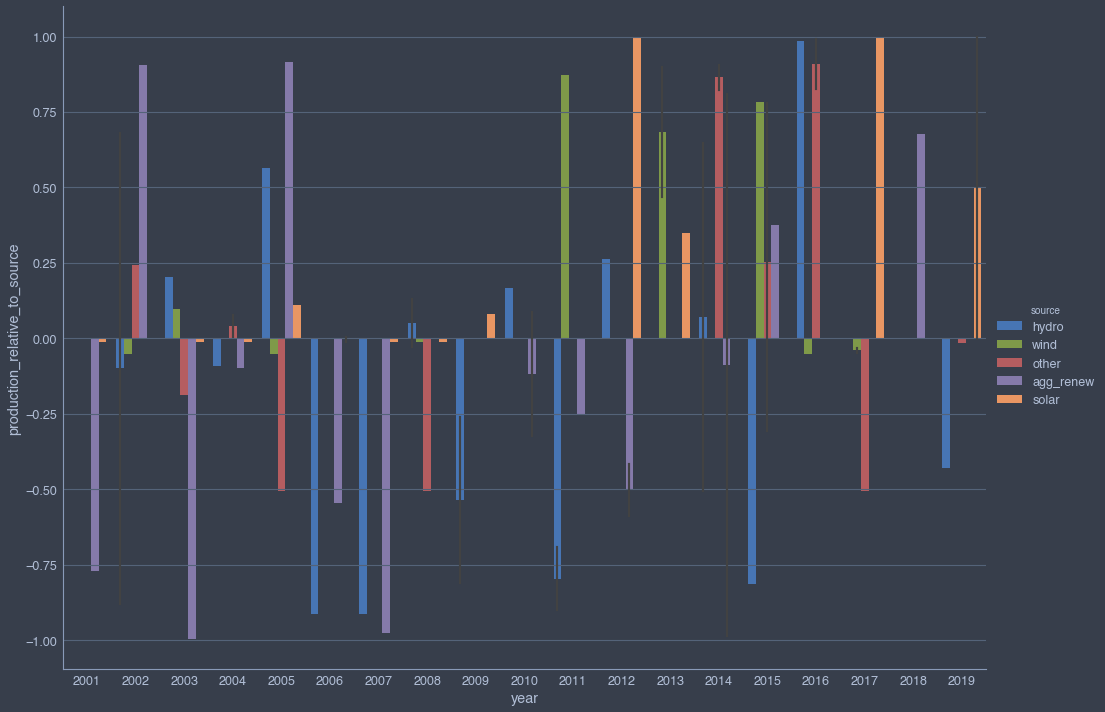

In [74]:
g = sns.catplot(x="year", 
                y="production_relative_to_source", 
                hue="source", 
                kind="bar", 
                height=10, 
                aspect=1.4,
                data=filtered_data)

## OUTPUT!

In [75]:
# Output to file
file_path = '../data/transformed/generated_consumption_production_by_source.csv'
agg_scaled_df.to_csv(file_path)

In [76]:
agg_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20780 entries, 0 to 21499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   entity                          20780 non-null  object        
 1   year                            20780 non-null  int64         
 2   source                          20780 non-null  object        
 3   production_percent              20780 non-null  float64       
 4   consumption_percent             20780 non-null  float64       
 5   renewable                       20780 non-null  bool          
 6   cp_ratio                        20780 non-null  float64       
 7   production_relative_to_source   20780 non-null  float64       
 8   consumption_relative_to_source  20780 non-null  float64       
 9   cp_ratio_relative_to_source     20780 non-null  float64       
 10  date                            20780 non-null  datetime64[ns]
dtypes:

In [77]:
agg_scaled_df['production_relative_to_source']

0        0.461895
1        0.444534
2        0.467954
3        0.431041
4        0.426042
           ...   
21495    0.221432
21496   -0.234185
21497    0.235005
21498   -0.255390
21499    0.253784
Name: production_relative_to_source, Length: 20780, dtype: float64